
# My Awesome Machine Learning Notebook

## Abstract

I wanted to buy a house for a while, so I started looking for places on the web. I know properties in NYC are expensive but, at least, I want to know how expensive they are. During my search,  I've noticed that the COVID-19 pandemic has affected the demand for housing, and home prices have risen more than 10 percent. Now I wonder how much I would have paid for a house if I had bought it right before the COVID-19 pandemic started. So I found a dataset on New York City Housing Price 2003 - 2019 and only used the information about ONE FAMILY DWELLING sales in 2019. I will use Linear Regression to predict the price of a house at the beginnig of 2020 in a specific zip code area based on gross square feet. 

## Section 1: Prepping the Regression datasets

This table show records of properties sales from 2003 to 2019. we've got data about the property's locatoon such as its zip code, city, address. We also have data about its class category, the land square feet, gross square feet, sale price and the sale date.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import sklearn
from sklearn .linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load DataFrame
df = pd.read_csv('data.csv')

# first 15 rows
df.head(15)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,02 TWO FAMILY HOMES,746 EAST 6 STREET,10009.0,2134.0,3542.0,1899.0,1800000,2003-01-22 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,316 EAST 3 STREET,10009.0,5746.0,2700.0,1900.0,0,2003-12-18 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,316 EAST 3 STREET,10009.0,5746.0,2700.0,1900.0,0,2003-12-18 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,125 AVENUE D,10009.0,2185.0,5725.0,1910.0,426000,2003-10-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,610 EAST 9 STREET,10009.0,2543.0,11568.0,1910.0,0,2003-02-28 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,151 AVENUE B,10009.0,2139.0,4416.0,1900.0,0,2003-08-28 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,636 EAST 11 STREET,10009.0,2369.0,10355.0,1880.0,0,2003-10-21 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,636 EAST 11 STREET,10009.0,2370.0,6652.0,1900.0,0,2003-10-21 00:00:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,165 AVENUE C,10009.0,1909.0,7437.0,1920.0,3,2003-06-16 00:00:00
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,165 AVENUE C,10009.0,1920.0,7485.0,1920.0,3,2003-06-16 00:00:00



    
From all the data obtained in the DatFrame, I will be using the following colums: 
1. **Gross square feet**
2. **Price Sale** - What we're trying to predict, this is how much a property will cost.

I will filter and clean a bit my data because as we can see some rows have no values or the sale price for a hose was set as less than $10.I will only use the data obtained from ONE FAMILY DWELLING sales during 2019 in the the 10312 zip code area. 

In [3]:
# Propieties with 0 values are not uselful, we wil converte to NaN
df = df.replace(0, np.NaN)
# Then, we will drop all the null values
df.dropna(inplace=True)

In [5]:
# Months and exact day are not important, so we will extarct just the year from sale date
df['SALE DATE'] = df['SALE DATE'].str.slice(stop=4)

# We will group the DataFrame by SALE DATE, ZIP CODE and BUILDING CLASS CATEGORY	
grp = df.groupby(['SALE DATE', 'ZIP CODE', 'BUILDING CLASS CATEGORY'])

# Now we will extract just the information we need. 
# ONE FAMILY DWELLING sales during 2019 in the the 10312 zip code area.

one_family_home = grp.get_group(('2019', 10312, '01 ONE FAMILY DWELLINGS'))

one_family_home

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
1591832,5,ANNADALE,01 ONE FAMILY DWELLINGS,21 FINGAL STREET,10312.0,9000.0,3540.0,1985.0,1650000.0,2019
1591833,5,ANNADALE,01 ONE FAMILY DWELLINGS,525 SYCAMORE STREET,10312.0,10000.0,2848.0,1980.0,775000.0,2019
1591834,5,ANNADALE,01 ONE FAMILY DWELLINGS,1468 ARDEN AVENUE,10312.0,5000.0,2200.0,1940.0,685000.0,2019
1591837,5,ANNADALE,01 ONE FAMILY DWELLINGS,108 LENZIE STREET,10312.0,5000.0,756.0,1920.0,620000.0,2019
1591839,5,ANNADALE,01 ONE FAMILY DWELLINGS,193 BATHGATE STREET,10312.0,5000.0,2800.0,2018.0,1221900.0,2019
...,...,...,...,...,...,...,...,...,...,...
1598017,5,ROSSVILLE,01 ONE FAMILY DWELLINGS,164 COVINGTON CIRCLE,10312.0,4204.0,2600.0,1999.0,10.0,2019
1598019,5,ROSSVILLE,01 ONE FAMILY DWELLINGS,155 COVINGTON CIRCLE,10312.0,4117.0,2500.0,2000.0,915000.0,2019
1598020,5,ROSSVILLE,01 ONE FAMILY DWELLINGS,64 COVINGTON CIRCLE,10312.0,4300.0,2600.0,1999.0,743323.0,2019
1598022,5,ROSSVILLE,01 ONE FAMILY DWELLINGS,44 COVINGTON CIRCLE,10312.0,4300.0,2600.0,2000.0,880000.0,2019


In [7]:
# We noticed that there rows indicating that some houses were sold for $10
# so we will consider only properties over a certain amount since houses in this area are not that cheap

one_family_home = one_family_home[one_family_home['SALE PRICE'] > 400000]
one_family_home

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
1591832,5,ANNADALE,01 ONE FAMILY DWELLINGS,21 FINGAL STREET,10312.0,9000.0,3540.0,1985.0,1650000.0,2019
1591833,5,ANNADALE,01 ONE FAMILY DWELLINGS,525 SYCAMORE STREET,10312.0,10000.0,2848.0,1980.0,775000.0,2019
1591834,5,ANNADALE,01 ONE FAMILY DWELLINGS,1468 ARDEN AVENUE,10312.0,5000.0,2200.0,1940.0,685000.0,2019
1591837,5,ANNADALE,01 ONE FAMILY DWELLINGS,108 LENZIE STREET,10312.0,5000.0,756.0,1920.0,620000.0,2019
1591839,5,ANNADALE,01 ONE FAMILY DWELLINGS,193 BATHGATE STREET,10312.0,5000.0,2800.0,2018.0,1221900.0,2019
...,...,...,...,...,...,...,...,...,...,...
1598015,5,ROSSVILLE,01 ONE FAMILY DWELLINGS,14 RUMBA PLACE,10312.0,2086.0,1548.0,1996.0,590000.0,2019
1598019,5,ROSSVILLE,01 ONE FAMILY DWELLINGS,155 COVINGTON CIRCLE,10312.0,4117.0,2500.0,2000.0,915000.0,2019
1598020,5,ROSSVILLE,01 ONE FAMILY DWELLINGS,64 COVINGTON CIRCLE,10312.0,4300.0,2600.0,1999.0,743323.0,2019
1598022,5,ROSSVILLE,01 ONE FAMILY DWELLINGS,44 COVINGTON CIRCLE,10312.0,4300.0,2600.0,2000.0,880000.0,2019


So fresh and so clean!

## Section 2: Linear Regression
I will predict the price of a ONE FAMILY DWELLING base on its Gross square feet.

First let's grab some subsets of our data to use for features.

In [89]:
# Finaly, we will extract Gross square feet, and Price Sale data
X = one_family_home[['GROSS SQUARE FEET']]
Y = one_family_home[['SALE PRICE']]

Nice and then we use sklearn to create a training set and test set. I will reserve 20% of the dataset for testing.

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Let's use that training set and fit a Linear Regression to it:

In [91]:
reg = LinearRegression().fit(x_train, y_train)

Now let's see what my awesome ML model predicts for the training set and how well it performed:

In [92]:
value_pred = reg.predict(x_test)

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

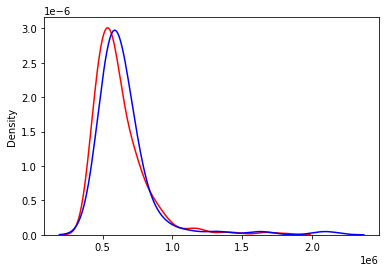

In [93]:
# we will display A Distribution plot, where the actual value is represent in red
# and the predicted value is represented in blue

ax1 = sns.distplot(y_train, hist=False, color='r', label='Actual Value')
sns.distplot(value_pred, hist=False, color='b', label='Firred Values', ax=ax1)

Now let's create a plot of our linear regression and our data. I will have the training data be blue dots, the test data green dots, with a red regression line cutting through the data.

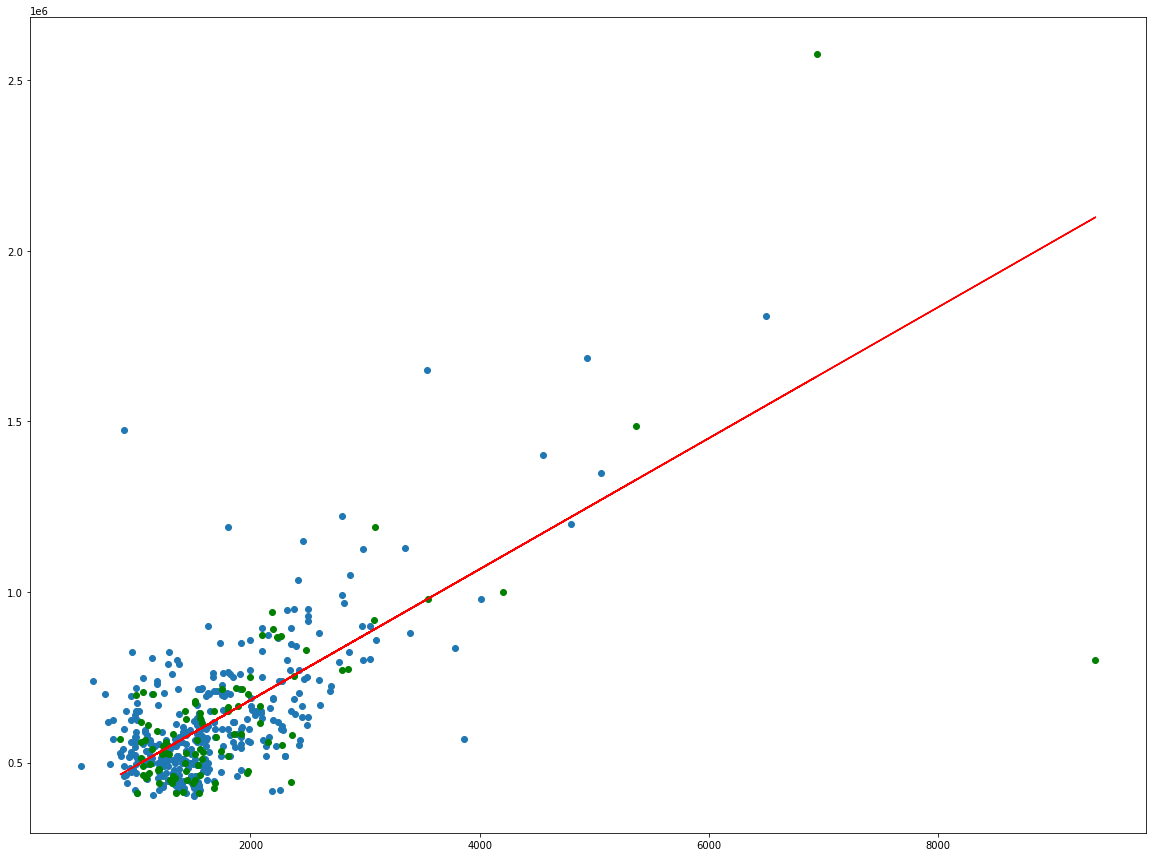

In [64]:
plt.figure(figsize=(20, 15))
#ax = fig.add_subplot(111)
plt.scatter(x=x_train, y=y_train, label='Train')
plt.scatter(x=x_test, y=y_test, c='g', label='Test')
plt.plot(x_test, value_pred, c='r', label='Linear Regression')
plt.show()

In [84]:
print(reg.score(x_train, y_train))

0.4805063438154762


In [98]:
# Display actual value and predicted value
prices = y_test
prices['predicted values'] = value_pred
prices['predicted values'] = prices['predicted values'].astype(int)
prices.tail(15)

<ipython-input-98-727b7c587bbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['predicted values'] = value_pred
<ipython-input-98-727b7c587bbf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices['predicted values'] = prices['predicted values'].astype(int)


,SALE PRICE,predicted values
1593461,470000.0,513486
1592197,455000.0,556269
1593541,550000.0,535741
1594412,715000.0,635119
1593380,509500.0,601545
1591933,800000.0,2097972
1594250,570000.0,465140
1594819,702500.0,678285
1594867,615000.0,699772
1591943,1485000.0,1329231


The R square indicates that predicted house value is aboutr 50% close to the fitted data.

Based on that output we can notice that some predicted values are not that far from the actual values. It can be improved if we used Multuple Linear regression and add LAND SQUARE FEET as independ variable but that will be part of a future project.

## Section 3: Prepping the classification dataset
**Requirements:**
+ At a high level, discuss what columns are included in the data
+ Load the dataset you've selected using pandas
+ Show the **head** of the data
+ For the columns you will be using in your classification, describe the range of values
+ For those columns map the values to a set of integers (if they aren't already)
+ Clean the data using pandas if needed

Since my imaginary cat dataset is the best dataset ever I can reuse it for this section as well. However I'm going to be using some slightly different cattributes in this section so let me talk about them a bit.

1. Cat eye color - possible values 'Blue', 'Green', 'Black' or 'Brown'
2. Tail length - described in Section 1
3. Fur Color - possible values: 'Grey', 'Orange', 'Black', 'White'

My data is already cleaned so I don't need to do that again, phew! However I will need to map some of my categorical data into numbers to work with sklearn libraries.

In [31]:
# Use pandas to map categories to ints, summarize your mapping below

Here's a summary of the data mapping:

0 = blue eyes

1 = green eyes

2 = black eyes

3 = brown eyes

## Section 4: Classification with a Neural Network (or classifier of choice)
**Requirements:**
+ Split your cleaned dataset using sklearn into a training and test set
+ **(Situational)** Scale your data to prevent overfitting
+ Fit a classifier to your training set
+ **(Optional)** visualize the classifier on a data plot
+ Report on the error rate for your test set
+ Comment on the result of this regression. Did it work well or not? Provide justification why or why not.


Time for some more learning. In this section I'm going to cat eye color, fur color, and tail length to predict the breed of the cat. (This imaginary dataset sure is robust!) I will do this using a neural network.

Once again let's split out our data into a training and test set. I will hold 20% of the data for testing.

In [ ]:
# Use sklearn to split our dataset

Before we train we also need to scale our data for our neural network. This is because neural networks are suspetible to overfitting on features that have a higher magnitude. To scale this data I will use a [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [32]:
# Use sklearn to scale your feature vector (if you use a neural network)

Alright now that our data is ready, let's create a neural network. For this project I will use a neural network with 3 hidden layers with 6 nodes per layer. The input size will be 3 (1 per attribute) and the output will be 8 (since there are 8 breeds of cat).

In [33]:
# Initialize a MLP Classifier with your choice of parameters

Now let's train this neural network and see how it performs on a sample input. Recall that my sample input is now standardized to use values between 0 and 1. I will also print out the weights of the trained network to verify that the training actually did something.

In [34]:
# Fit the network, print the trained weights, and try sample data`

Optionally it would be really cool if I created a visual to display the trained network weights or the classification regions (given the right dimensionality).

In [35]:
# Optional classifier visualzation code!

Once again let's analyze the accuracy of our machine learning. Here is the accuracy for the test set.

In [36]:
# Report on the accuracy of the Test set for your classifier

And just as before let's do a k-fold cross validation to see if we didn't just get lucky (or unlucky on our first go).

In [ ]:
# Just as in Section 2, perform more analysis, try different neural network architectures or ways of splitting the data

Based on that result it looks like our neural network is not an effective predictor of cat breed. That's unfortunate but perhaps some mysterious of cats are best left unsolved.

## Conclusions
**Requirements:**
+ Summarize the findings of your report
+ Repeat your methodology and key findings for Section 2. and Section 4.
+ Highlight what you found interesting
+ Discuss what you would do to extend the project further


Here I summarize what I did in this report. Highlighting what I did, what I found interesting or surprising. I sum up and conclusions and what I would do to extend this project further in a V2.